In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
import os
os.chdir('/content/drive/MyDrive/Airline Passenger Satisfaction')

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [139]:
data = pd.read_csv('Data/train.csv')
data.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [140]:
data.shape

(103904, 25)

In [141]:
df1 = data.drop(data.loc[:,['Unnamed: 0','id']], axis = 1)
df1.describe(include = 'all')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904,103904,103904.000000,103904,103904,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904
unique,2,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied
freq,52727,84923,NaN,71655,49665,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58879
mean,NaN,NaN,39.379706,NaN,NaN,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,NaN
std,NaN,NaN,15.114964,NaN,NaN,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,NaN
min,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN
50%,NaN,NaN,40.000000,NaN,NaN,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN
75%,NaN,NaN,51.000000,NaN,NaN,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN


In [142]:
# Finding null values
df1.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [143]:
# Removing null values
df1.dropna(inplace = True)

In [144]:
df1.columns = [c.replace(' ', '_') for c in df1.columns]

In [145]:
# Categorical features
cat_features = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

# Ordinal features
ordinal_features = ['Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness']
       
# Numerical features
num_features = ['Age', 'Flight_Distance', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']

In [146]:
df1.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


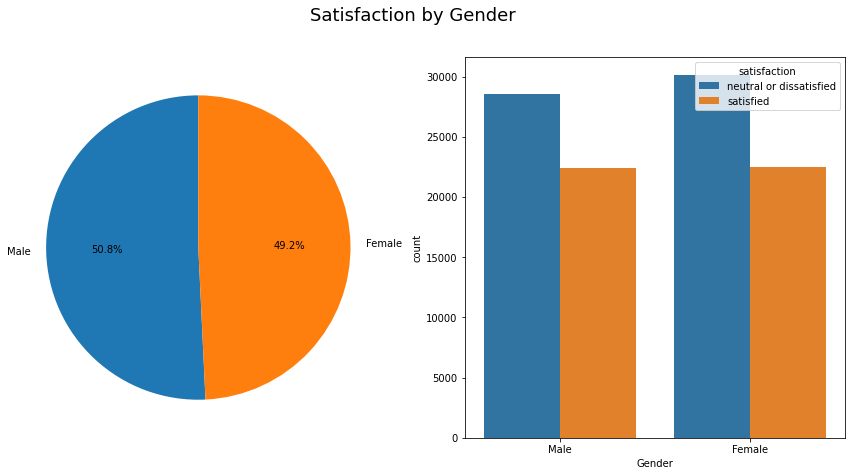

In [147]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.pie(df1.Gender.value_counts(), labels = df1['Gender'].unique(), startangle=90, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(x = 'Gender', hue = 'satisfaction', data = df1)
plt.suptitle("Satisfaction by Gender", fontsize = 18)
plt.show()

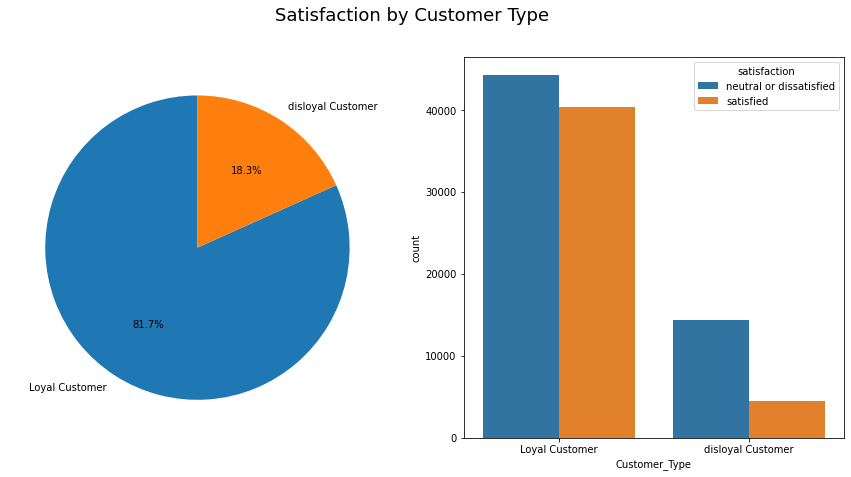

In [148]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.pie(df1.Customer_Type.value_counts(), labels = df1['Customer_Type'].unique(), startangle=90, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(x = 'Customer_Type', hue = 'satisfaction', data = df1)
plt.suptitle("Satisfaction by Customer Type", fontsize = 18)
plt.show()

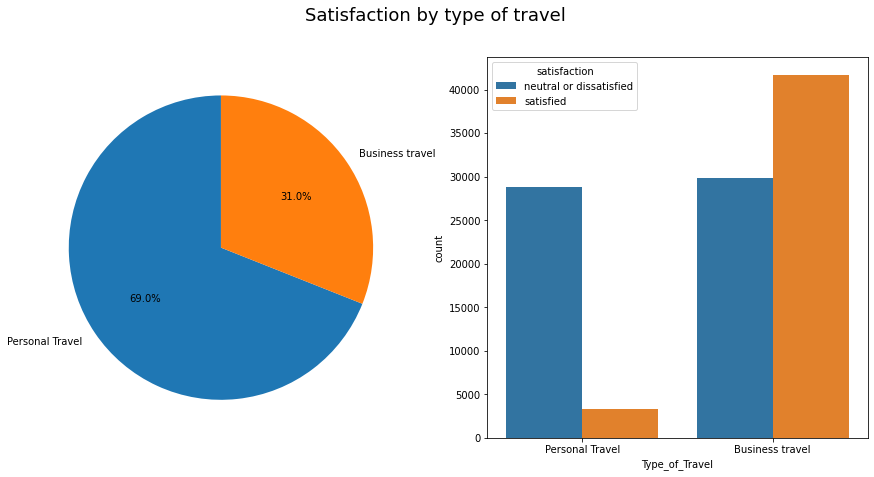

In [149]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.pie(df1.Type_of_Travel.value_counts(), labels = df1['Type_of_Travel'].unique(), startangle=90, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(x = 'Type_of_Travel', hue = 'satisfaction', data = df1)
plt.suptitle("Satisfaction by type of travel", fontsize = 18)
plt.show()

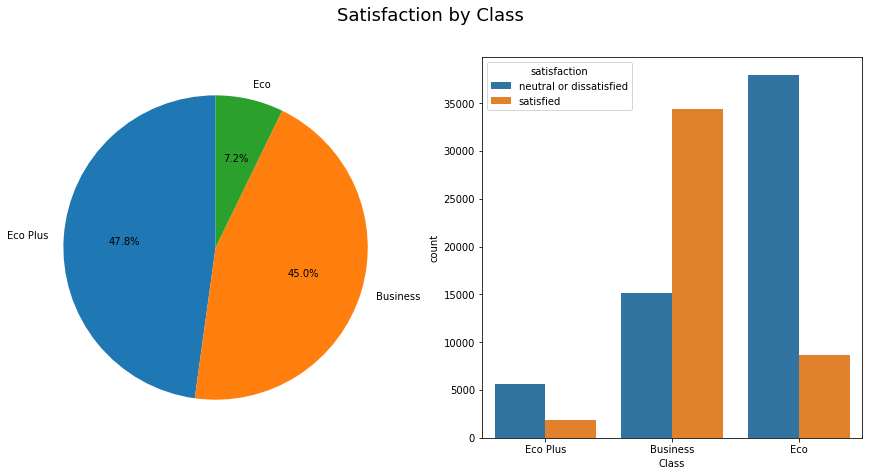

In [150]:
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.pie(df1.Class.value_counts(), labels = df1['Class'].unique(), startangle=90, autopct='%1.1f%%')
plt.subplot(122)
sns.countplot(x = 'Class', hue = 'satisfaction', data = df1)
plt.suptitle("Satisfaction by Class", fontsize = 18)
plt.show()

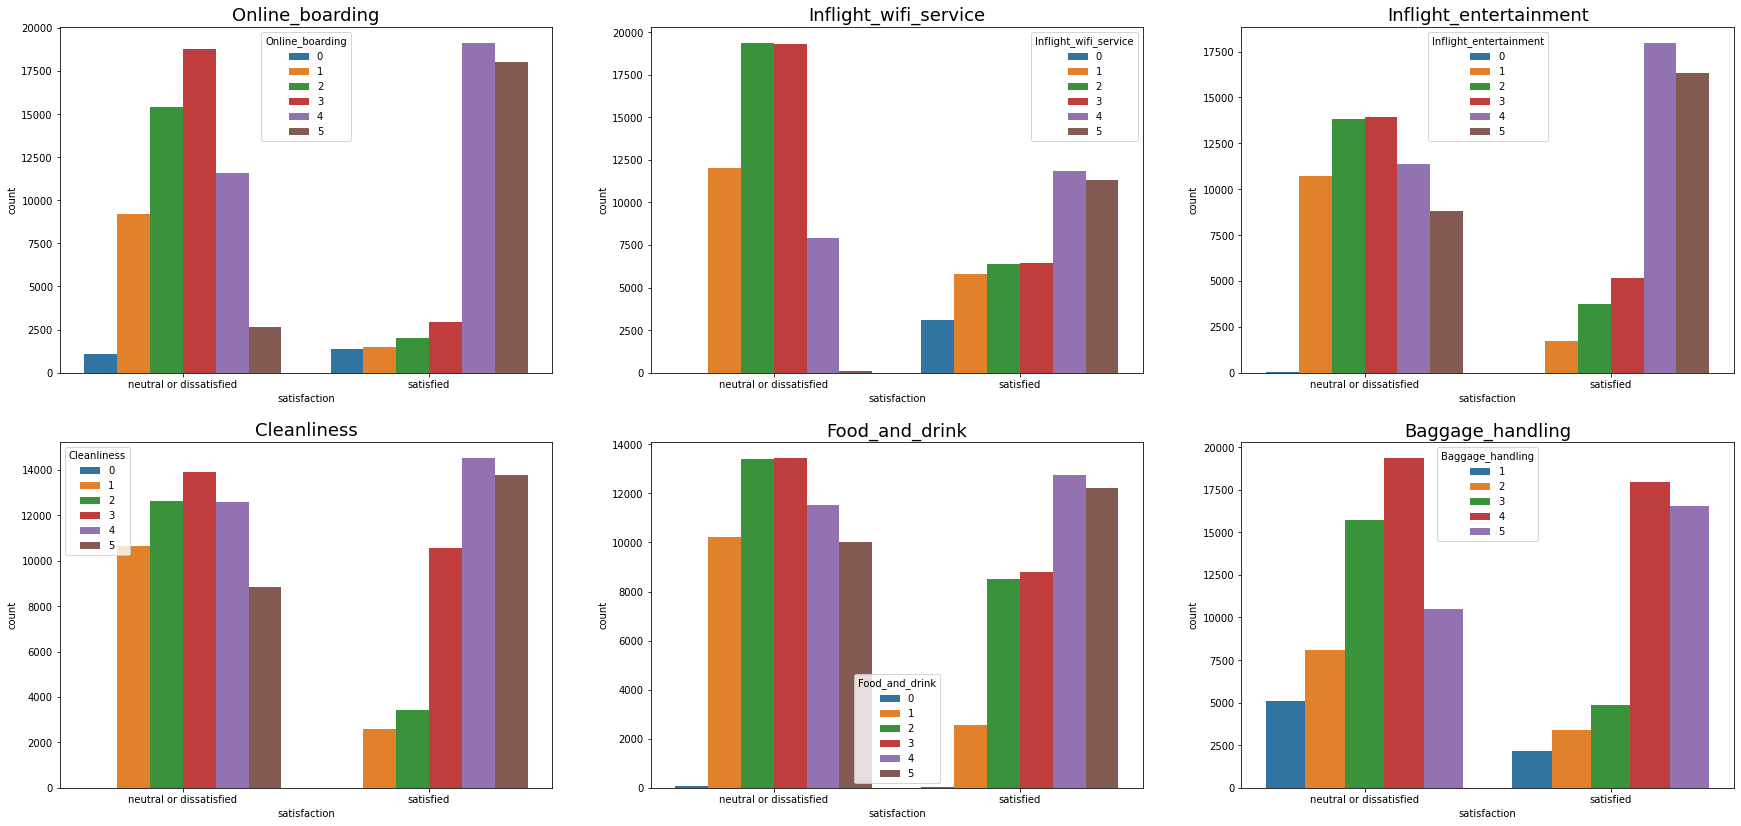

In [151]:
fig = plt.figure(figsize=(30,14))
plt.subplot(231)
sns.countplot(x = 'satisfaction', hue = 'Online_boarding', data = df1)
plt.title("Online_boarding", fontsize = 18)
plt.subplot(232)
sns.countplot(x = 'satisfaction', hue = 'Inflight_wifi_service', data = df1)
plt.title("Inflight_wifi_service", fontsize = 18)
plt.subplot(233)
sns.countplot(x = 'satisfaction', hue = 'Inflight_entertainment', data = df1)
plt.title("Inflight_entertainment", fontsize = 18)
plt.subplot(234)
sns.countplot(x = 'satisfaction', hue = 'Cleanliness', data = df1)
plt.title("Cleanliness", fontsize = 18)
plt.subplot(235)
sns.countplot(x = 'satisfaction', hue = 'Food_and_drink', data = df1)
plt.title("Food_and_drink", fontsize = 18)
plt.subplot(236)
sns.countplot(x = 'satisfaction', hue = 'Baggage_handling', data = df1)
plt.title("Baggage_handling", fontsize = 18)
plt.show()

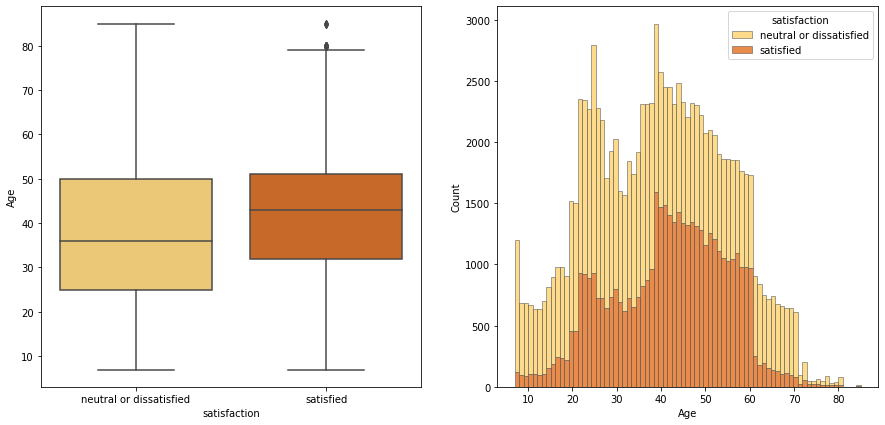

In [152]:
f, ax = plt.subplots(1, 2, figsize = (15,7))
sns.boxplot(x = "satisfaction", y = "Age", palette = "YlOrBr", data = df1, ax = ax[0])
sns.histplot(df1, x = "Age", hue = "satisfaction", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.show()

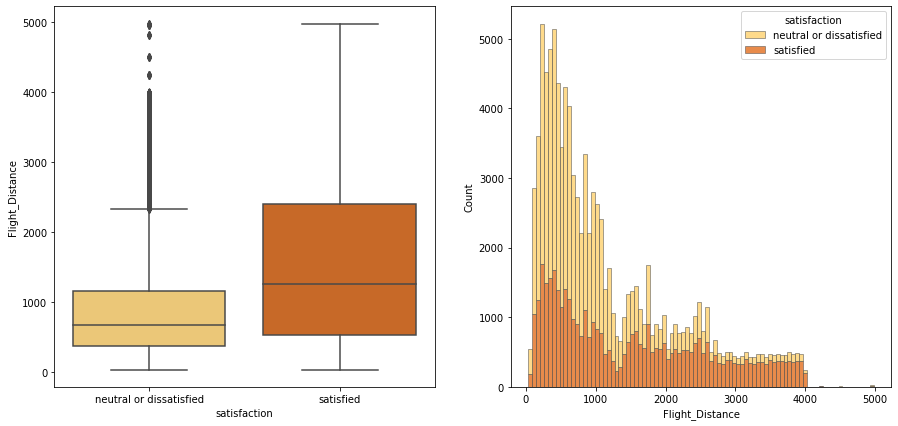

In [153]:
f, ax = plt.subplots(1, 2, figsize = (15,7))
sns.boxplot(x = "satisfaction", y = "Flight_Distance", palette = "YlOrBr", data = df1, ax = ax[0])
sns.histplot(df1, x = "Flight_Distance", hue = "satisfaction", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.show()

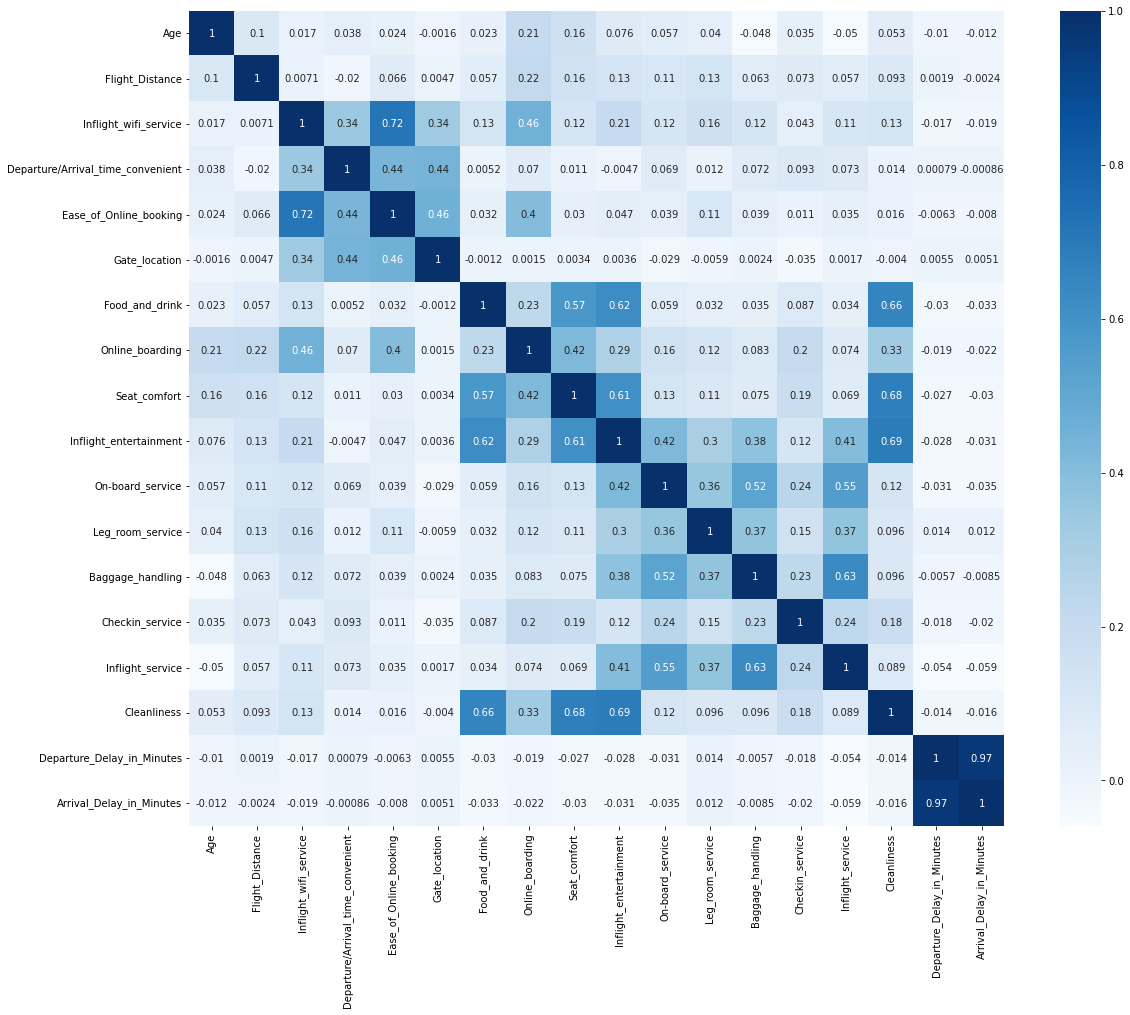

In [154]:
plt.figure(figsize = (20,15))
sns.heatmap(df1.corr(), annot = True, square = True, cmap = 'Blues')
plt.show()

In [155]:
df1 = df1.drop(df1.loc[:,['Arrival_Delay_in_Minutes', 'Ease_of_Online_booking']], axis = 1)

In [156]:
num_features.remove('Arrival_Delay_in_Minutes')
ordinal_features.remove('Ease_of_Online_booking')

In [157]:
df1['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
target = df1['satisfaction']

In [158]:
num_features.extend(ordinal_features)

In [159]:
scaling_features = num_features.copy()

In [160]:
from sklearn import preprocessing

df_num = df1[scaling_features]
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df_num)
scaled_df_n = pd.DataFrame(r_scaler.transform(df_num), columns=df_num.columns)
scaled_df_n.head()

,Age,Flight_Distance,Departure_Delay_in_Minutes,Inflight_wifi_service,Departure/Arrival_time_convenient,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness
0,0.076923,0.086632,0.015704,0.6,0.8,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0
1,0.230769,0.041195,0.000628,0.6,0.4,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2
2,0.243590,0.224354,0.000000,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0
3,0.230769,0.107229,0.006910,0.4,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4
4,0.692308,0.036955,0.000000,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6


In [161]:
df_cat = pd.get_dummies(df1[cat_features], drop_first = True)
df_cat.head()

,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


In [162]:
print(scaled_df_n.shape)
print(df_cat.shape)
print(target.shape)

(103594, 16)
(103594, 5)
(103594,)


In [163]:
df2 = pd.concat([scaled_df_n.reset_index(drop = True), df_cat.reset_index(drop = True), target.reset_index(drop = True)], axis = 1)
df2.head()

,Age,Flight_Distance,Departure_Delay_in_Minutes,Inflight_wifi_service,Departure/Arrival_time_convenient,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,...,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Gender_Male,Customer_Type_disloyal Customer,Type_of_Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction
0,0.076923,0.086632,0.015704,0.6,0.8,0.2,1.0,0.6,1.0,1.0,...,0.75,0.8,1.0,1.0,1,0,1,0,1,0
1,0.230769,0.041195,0.000628,0.6,0.4,0.6,0.2,0.6,0.2,0.2,...,0.50,0.2,0.8,0.2,1,1,0,0,0,0
2,0.243590,0.224354,0.000000,0.4,0.4,0.4,1.0,1.0,1.0,1.0,...,0.75,0.8,0.8,1.0,0,0,0,0,0,1
3,0.230769,0.107229,0.006910,0.4,1.0,1.0,0.4,0.4,0.4,0.4,...,0.50,0.2,0.8,0.4,0,0,0,0,0,0
4,0.692308,0.036955,0.000000,0.6,0.6,0.6,0.8,1.0,1.0,0.6,...,0.75,0.6,0.6,0.6,1,0,0,0,0,1


In [164]:
X = df2.loc[ : ,df2.columns!='satisfaction']
y = df2[['satisfaction']]

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [167]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,10,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,10,1)
min_samples_leaf = np.arange(2,10,1)

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [168]:
rf2 = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf2,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=5, 
                               random_state = 42)

rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])},
                   random_state=42)

In [169]:
best_rf = rf_random.best_estimator_
best_rf.fit(X_train, y_train)
best_rf.score(X_train, y_train), best_rf.score(X_test, y_test)

(0.9409110105580694, 0.9386070756310633)

In [170]:
rf_random.score(X_test,y_test)

0.9386070756310633

In [171]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [172]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8754992458521871, 0.8743182586032144)

In [173]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(n_estimators=200)

In [174]:
xgb.score(X_train, y_train), xgb.score(X_test,y_test)

(0.9508778280542987, 0.9481635214054732)

In [175]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [176]:
models = {}
models["Logistic Regression"] = logreg
models["kNN"] = knn
models["Random Forest with CV"] = best_rf
models["XGBoost"] = xgb

In [177]:
acc, auc, rec, pre, names = list(), list(), list(), list(), list()
for name, model in models.items():
  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  roc_auc = roc_auc_score(y_test,pred)
  recall = recall_score(y_test,pred)
  precision = precision_score(y_test,pred)
  names.append(name)
  acc.append(accuracy)
  auc.append(roc_auc)
  rec.append(recall)
  pre.append(precision)

In [178]:
tuples = list(zip(names, acc, auc, rec, pre))  

metrics = pd.DataFrame(tuples, columns=['Model', 'Accuracy', 'AUC Score', 'Recall', 'Precision'])  
metrics.sort_values(by= 'AUC Score', ascending=False)

,Model,Accuracy,AUC Score,Recall,Precision
3,XGBoost,0.948164,0.945229,0.922514,0.956882
2,Random Forest with CV,0.938607,0.936309,0.918523,0.939136
1,kNN,0.926782,0.920282,0.869970,0.958008
0,Logistic Regression,0.874318,0.869838,0.835162,0.870882


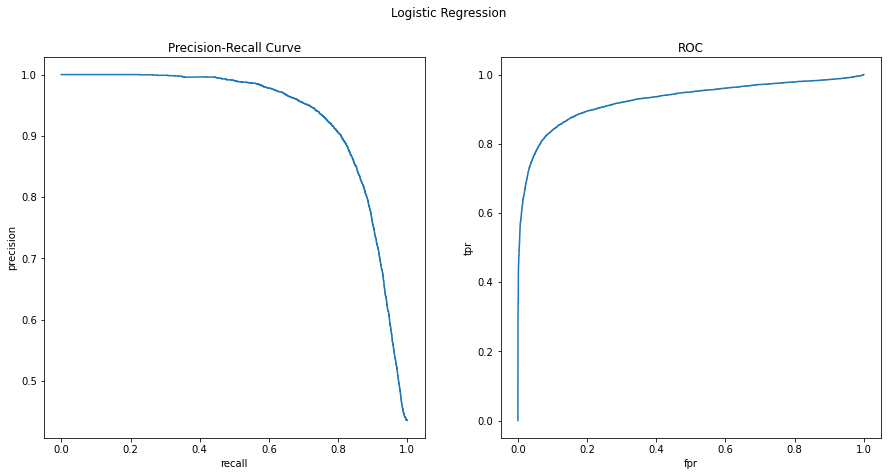

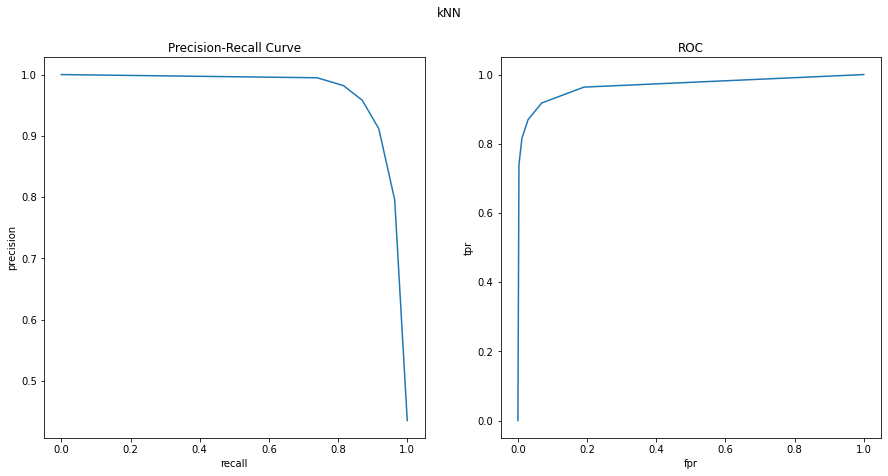

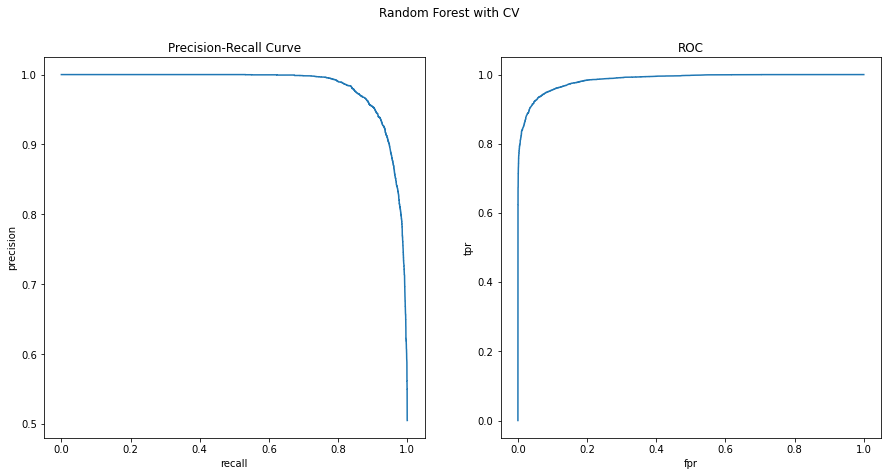

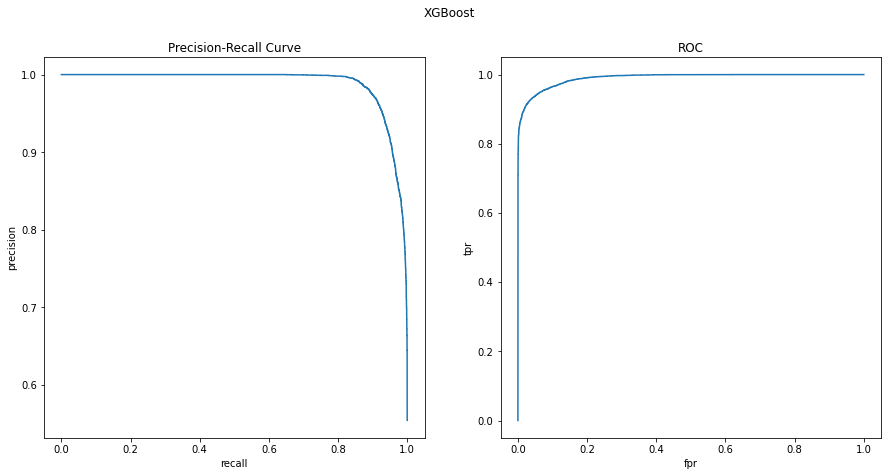

In [179]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve


for name, model in models.items():
  prob = model.predict_proba(X_test)[: , 1]
  precision, recall, threshold = precision_recall_curve(y_test, prob)

  fpr, tpr, threshold = roc_curve(y_test, prob)

  fig = plt.figure(figsize=(15,7))
  plt.subplot(121)
  plt.plot(recall, precision)
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.title("Precision-Recall Curve")
  plt.subplot(122)
  plt.plot(fpr, tpr)
  plt.xlabel("fpr")
  plt.ylabel("tpr")
  plt.title("ROC")
  plt.suptitle(name)
plt.show()

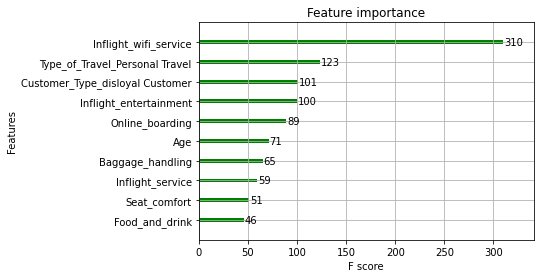

In [180]:
from xgboost import plot_importance
plot_importance(xgb, max_num_features = 10, color = 'green') 

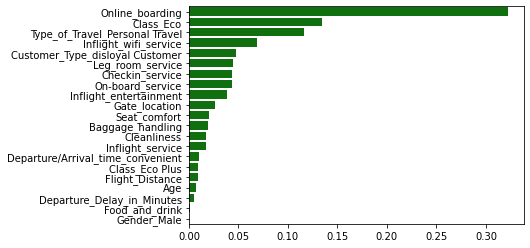

In [181]:
feature_scores = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x = feature_scores, y=feature_scores.index, color = 'green')

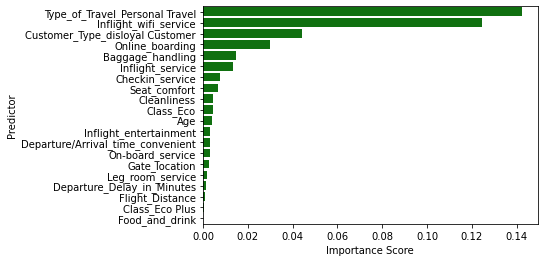

In [182]:
from sklearn.inspection import permutation_importance

r = permutation_importance(xgb, X, y, n_repeats=1, random_state=0)

para, sco = list(), list()
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:        
        parameter = list(X)[i]
        score = r.importances_mean[i]
        
        para.append(parameter)
        sco.append(score)

# Convert lists into pandas Dataframe
chart = list(zip(para, sco))    
charts = pd.DataFrame(chart, columns=['Predictor', 'Importance Score']) 
sns.barplot(x = charts["Importance Score"], y=charts["Predictor"], color = 'green')

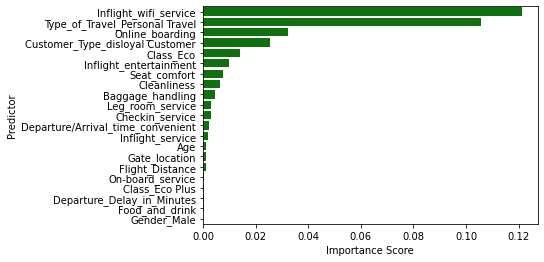

In [183]:
from sklearn.inspection import permutation_importance

r = permutation_importance(best_rf, X, y, n_repeats=1, random_state=0)

para, sco = list(), list()
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:        
        parameter = list(X)[i]
        score = r.importances_mean[i]
        
        para.append(parameter)
        sco.append(score)

# Convert lists into pandas Dataframe
chart = list(zip(para, sco))    
charts = pd.DataFrame(chart, columns=['Predictor', 'Importance Score'])  
sns.barplot(x = charts["Importance Score"], y=charts["Predictor"], color = 'green')
